# Unsupervised Learning

## Davis SML: Lecture 10 Part 3

## Prof. James Sharpnack

In [ ]:
#!conda install lxml nltk 
#!pip install plotnine

In [4]:
from lxml import html, etree
import numpy as np
from sklearn import cluster, feature_extraction, metrics, preprocessing, decomposition
import collections
import nltk
import pandas as pd
import plotnine as p9
#nltk.download('all')
# Download Corpora -> stopwords, Models -> punkt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Kourosh
[nltk_data]    |     Vali\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to C:\Users\Kourosh
[nltk_data]    |     Vali\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\Kourosh
[nltk_data]    |     Vali\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to C:\Users\Kourosh
[nltk_data]    |     Vali\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown.zip.
[nltk_data]    | Downloading package brown_tei to C:\Users\Kourosh
[nltk_data]    |     Vali\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to C:\Users\Kouros

### TFIDF vectorization

- document vectorization counts the proportion of words in document
- $X_{i,j}$ is the "proportion" of word j in document i
- tfidf indicates term-frequency (proportion of words in document i which is word j), and inverse document frequency (log of inverse frequency of documents containing word j)

In [10]:
reu = html.parse("../../data/reuters/reut2-000.sgm") #You will have to do this for all sgm files here

In [11]:
def parse_reu(reu):
    """Parses the etree object and returns a list of dictionary of reuters attr
    Output: {'topics': the topic of the article, 'places': where it is located, 
        'split': training/test split, 'body':the text of the article as a set of words with stopwords removed}
    """
    root= reu.getroot()
    articles = root.body.getchildren()
    stop_words = set(stopwords.words('english'))
    reu_pl = []
    for a in articles:
        reu_parse = {}
        if a.attrib['topics'] != 'YES':
            next
        topics = a.find('topics').findall('d')
        if topics:
            reu_parse['topics'] = [t.text for t in topics]
        else:
            reu_parse['topics'] = []
        places = a.find('places').findall('d')
        if places:
            reu_parse['places'] = [t.text for t in places]
        reu_parse['split'] = a.attrib['lewissplit']
        rtxt = a.find('text')
        word_tokens = word_tokenize(rtxt.text_content())
        filtered_sentence = " ".join([w.lower() for w in word_tokens if not w in stop_words])
        reu_parse['body'] = filtered_sentence
        reu_pl.append(reu_parse)
    return reu_pl

In [12]:
reu_pl = parse_reu(reu)

In [13]:
print(reu_pl[0]['topics'])
reu_pl[0]['body']

['cocoa']


'bahia cocoa review salvador , feb 26 - showers continued throughout week bahia cocoa zone , alleviating drought since early january improving prospects coming temporao , although normal humidity levels restored , comissaria smith said weekly review . the dry period means temporao late year . arrivals week ended february 22 155,221 bags 60 kilos making cumulative total season 5.93 mln 5.81 stage last year . again seems cocoa delivered earlier consignment included arrivals figures . comissaria smith said still doubt much old crop cocoa still available harvesting practically come end . with total bahia crop estimates around 6.4 mln bags sales standing almost 6.2 mln hundred thousand bags still hands farmers , middlemen , exporters processors . there doubts much cocoa would fit export shippers experiencing dificulties obtaining +bahia superior+ certificates . in view lower quality recent weeks farmers sold good part cocoa held consignment . comissaria smith said spot bean prices rose 340 

In [14]:
vec = feature_extraction.text.TfidfVectorizer()
X = vec.fit_transform(doc['body'] for doc in reu_pl)
X.shape
#X is a sparse matrix

(1000, 10749)

### Document clustering

- rows are documents, columns are words
- clustering with sklearn KMeans
- selected 10 clusters arbitrarily

In [15]:
doc_clust = cluster.KMeans(n_clusters=10)
doc_clust.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
doc_clust.cluster_centers_.shape
#this is no more sparse matrix but a dense matrix as the center vectors are averaged.

(10, 10749)

In [18]:
vocab_lookup = {b:a for a,b in vec.vocabulary_.items()}

In [19]:
ccargsort = doc_clust.cluster_centers_.argsort(axis=1)

In [20]:
center_vocab = [[vocab_lookup[row[-i]] for i in range(1,21)] for row in ccargsort]

In [21]:
print("\n\n".join([" ".join(voc) for voc in center_vocab]))

said the banks would talks debt government bank brazil market new coffee last japan japanese securities trade year billion pct

blah to says in dlrs fed pct mln for billion from week cts vs dlr of sears rospatch diagnostic after

vs loss 000 cts profit net oper shr revs mln qtr dlrs 4th year note avg shrs excludes 1986 12

mln tonnes dlrs oil said stg opec the bank prices market pct 000 1986 march year sales ec forecast 1987

shares stock said common dlrs split share inc company mln pct debentures offering march the corp outstanding offer record payable

said company inc the corp new unit march reuter dlrs contract co mln agreement 26 products feb air york group

vs net mln cts shr 000 revs dlrs qtr avg shrs sales mths 4th 31 jan note billion inc year

cts div record qtly pay prior vs march franklin payout dividend april mateo fund san sets calif mthly free 13

pct january the december year bond issue february said coupon index mln billion eurobond tons franc lead march rose rate

bill

In [22]:
clust_counts = collections.Counter(doc_clust.labels_)

In [23]:
clust_counts

Counter({3: 123,
         5: 239,
         0: 185,
         4: 101,
         6: 72,
         9: 52,
         2: 44,
         8: 76,
         1: 60,
         7: 48})

In [24]:
#prototyping
proto_inds = metrics.pairwise_distances_argmin(doc_clust.cluster_centers_,X)

In [25]:
print("\n\n".join([reu_pl[i]['body'] for i in proto_inds]))

brazil criticises advisory committee structure by sandy critchley , reuters london , march 2 - brazil happy existing structure 14-bank advisory committee coordinates commercial bank debt , finance minister dilson funaro said . u.s. banks 50 pct representation committee holding 35 pct brazil 's debt banks , said , adding `` this fair european japanese banks . '' the committee played useful role 1982 1983 , however . noting often different reactions u.s. , japanese european banks , funaro told journalists brazil might adopt approach involving separate discussions regions . since debtor nations ' problems normally treated case-by-case basis , `` perhaps principle apply creditors , '' central bank president francisco gros said . brazil february 20 suspended indefinitely interest payments 68 billion dlrs owed commercial banks , followed last week freeze bank trade credit lines deposited foreign banks institutions , worth 15 billion dlrs . funaro gros spent two days end last week washington 

### Word clustering

- take the transpose of X
- rows are words and columns are documents
- clusters of words based on document co-occurrence

In [26]:
word_clust = cluster.KMeans(n_clusters=10)
#W = preprocessing.StandardScaler(with_mean=False).fit_transform(X.transpose())
word_clust.fit(X.transpose())

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
clust_counts = collections.Counter(word_clust.labels_)

In [28]:
clust_counts

Counter({4: 10128, 8: 6, 1: 31, 7: 441, 2: 19, 9: 114, 6: 1, 0: 5, 5: 1, 3: 3})

In [29]:
[" ".join([vocab_lookup[i] for i in np.where(word_clust.labels_ == i)[0]]) for i in range(1,10)]

opk rosario rosemarie rosemary rosenbaum rosenkrantz rosie rospatch rosptach ross rostenkowski rotary rotavirus rothschilds rotorua rotterdam roughly round rounded route routed routes routine routinely row royal royalties royalty royce rpch rpt rsvp rtrs rtrsy rubber rubbr rudolph rule ruled rules ruling rumor rumored rumors rumour rumoured rumours run runaway running runs runway rupees rupiah rural rushed rushing russell russelsteel rutherford ryan rye ryoka sa saab saatchi sabah sabhavasu sachs sachy sacking sacrificing saddle safe safeguard safety sagging sailing saiod saito salaam salaried salaries salary sald saleable salem salesman salespeople salina salomon salt salvador salvage sam same samoa sample samples samsung samuel sanctions sandy sanford santa santos sar saragossa sarasota sarich sassou satellite satisfaction satisfactory satisfied satisfy sato satoshi saturday saumier savage savaged savannah save saved saving savings saviour saw sawdon sb scale scaled scales scandal sc

In [30]:
proto_inds = metrics.pairwise_distances_argmin(word_clust.cluster_centers_,X.transpose())

In [31]:
print("\n".join([vocab_lookup[i] for i in proto_inds]))

common
reuter
mateo
net
byron
cts
blah
byron
revs
fertile


### Principle Components for documents

- PCA reduces dimensions
- sklearn PCA for dense matrices
- sklearn TruncatedSVD for sparse (does not center)

In [32]:
doc_SVD = decomposition.TruncatedSVD(n_components=2)
X_pca = doc_SVD.fit_transform(X)

In [33]:
X_df = pd.DataFrame(X_pca,columns=['pca_1','pca_2'])
X_df['clust'] = doc_clust.labels_

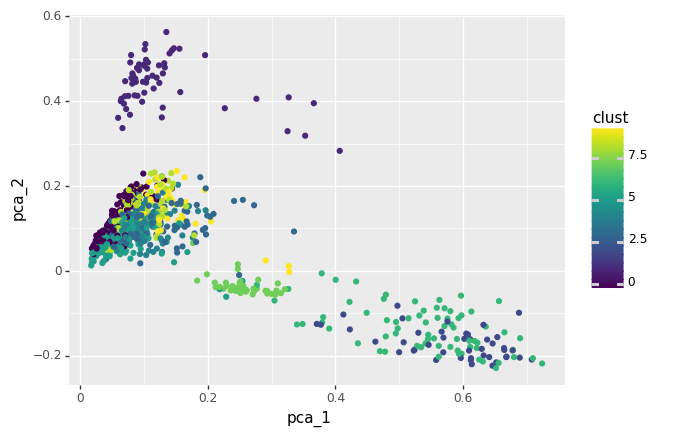

<ggplot: (-9223371894749381667)>

In [34]:
p9.ggplot(X_df, p9.aes(x='pca_1',y='pca_2',color='clust')) + p9.geom_point()